In [13]:
# python script to calculate a PCA of the Presence / Absence matrix of the genes in the genome of the strains

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [14]:
# read tsv from the file tables/gene_pa_matrix.Rtab
PA_data = pd.read_csv("../tables/gene_pa_matrix.Rtab", sep="\t", index_col=0)
PA_data

,GCA_005381785,GCA_005382085,GCA_005382125,GCA_005382165,GCA_005382185,GCA_005382325,GCA_005382465,GCA_005382565,GCA_005382585,GCA_005382625,...,GCA_005042225,GCA_005042235,GCA_005042365,GCA_005042655,GCA_005042755,GCA_005042935,GCA_005043025,GCA_005043055,GCA_005043215,GCA_005043285
Gene,,,,,,,,,,,,,,,,,,,,,
envZ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mgtA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fadI~~~fadJ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
helD,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
group_22095,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dppB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# PCA of the tranposed matrix
pca = PCA(n_components=2)
pca.fit(PA_data.T)
pca_data = pca.transform(PA_data.T)

Text(0.5, 1.0, 'PCA of the Presence / Absence matrix of the genes in the genome of the strains')

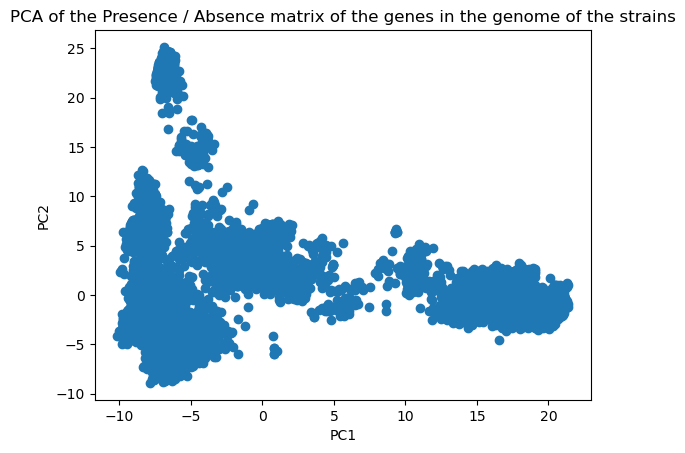

In [16]:
PA_data.T.index

# plot the PCA
plt.figure()
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the Presence / Absence matrix of the genes in the genome of the strains')

In [17]:
# save the PCA data
PCA_data = pd.DataFrame(pca_data, index=PA_data.T.index, columns=['PC1', 'PC2'])
PCA_data.to_csv("../tables/PCA_gene_pa_matrix.tsv", sep="\t")

In [18]:
# variability explained by the PCs
print(pca.explained_variance_ratio_)

[0.13265422 0.05499451]
